In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from qbstyles import mpl_style

from sklearn.tree import DecisionTreeClassifier

sns.set(rc={'figure.figsize': (6,6)})

In [2]:
#setting the style for the visualizations
mpl_style('dark')

In [3]:
df = pd.read_pickle('df.pkl') #load the full data set
y = df.Type
X = df.iloc[:, 1:]
X

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000009694.12,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
1,0.017243,0.000000,1.557943,0.0,5.017788,6.132192,0.0,0.017186,66.914631,0.158791,...,0.007595,0.007793,0.0,0.055523,0.028739,10.243520,0.250405,0.0,0.613717,0.0
2,0.000000,0.003233,2.697767,0.0,4.903484,9.750896,0.0,0.014376,72.009991,0.085830,...,0.030789,0.063184,0.0,0.000000,0.000000,16.606613,0.082307,0.0,0.170743,0.0
3,0.000000,0.000000,5.831249,0.0,3.054890,17.232771,0.0,0.006936,89.093490,0.134583,...,0.144831,0.000000,0.0,0.058823,0.121788,20.069360,0.530575,0.0,0.305974,0.0
4,0.018671,0.002591,5.013642,0.0,3.972959,14.478933,0.0,0.007975,154.499392,0.051581,...,0.022615,0.000000,0.0,0.090179,0.062236,18.965261,0.095264,0.0,1.558708,0.0
5,0.000000,0.003404,3.739011,0.0,2.789155,15.336983,0.0,0.050073,143.640545,0.158165,...,0.040526,0.027722,0.0,0.276519,0.040894,12.879618,0.125190,0.0,0.488011,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,0.051162,0.035495,1.633119,0.0,3.713046,11.025967,0.0,0.004856,97.437901,0.047115,...,0.101405,3.283387,0.0,0.247111,0.000000,15.362268,0.120482,0.0,0.053557,0.0
2106,1.285180,0.002050,3.671020,0.0,3.854596,12.135606,0.0,0.110772,72.169839,0.000000,...,3.085640,0.056747,0.0,0.142697,0.000000,13.727288,0.197126,0.0,0.286078,0.0
2107,0.020972,0.008730,1.490144,0.0,3.704053,12.869675,0.0,0.183140,116.352616,0.000000,...,0.599253,0.004739,0.0,0.000000,0.000000,10.667128,0.370400,0.0,0.032931,0.0
2108,0.036165,0.000000,2.126202,0.0,3.907258,10.615778,0.0,0.149328,98.345480,0.000000,...,0.605300,0.286032,0.0,0.058226,0.000000,11.744629,0.283886,0.0,0.075717,0.0


In [4]:
#X = pd.read_csv('IX_CancerData_TB.csv', index_col=0)
#X.to_pickle('df.pkl')

In [5]:
names = y.value_counts().index #creating a list of all the different cancer types 

In [6]:
#creating a binary classification model for each cancer type so I created the y variable for each cancer type
ydf = pd.DataFrame()
for col in names:
    ydf[f'{col}'] = (y == col)*1

ydf

,OV,BLCA,PRAD,COAD,LUAD,HNSC,KIRC,BRCA,LUSC,KIRP,LIHC
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2105,0,0,0,0,0,0,0,0,0,1,0
2106,0,0,0,0,0,0,0,0,0,1,0
2107,0,0,0,0,0,0,0,0,0,1,0
2108,0,0,0,0,0,0,0,0,0,1,0


In [7]:
#creating a decision tree classifier for each cancer type. And checking if it works
for cancer in names:
    tree = DecisionTreeClassifier()
    tree.fit(X = X, y = ydf[col])
    y_pred = tree.predict(X)
    print(f'Classification accuracy for {cancer}= ', np.sum(ydf[col] == y_pred)/X.shape[0])

Classification accuracy for OV=  1.0
Classification accuracy for BLCA=  1.0
Classification accuracy for PRAD=  1.0
Classification accuracy for COAD=  1.0
Classification accuracy for LUAD=  1.0
Classification accuracy for HNSC=  1.0
Classification accuracy for KIRC=  1.0
Classification accuracy for BRCA=  1.0
Classification accuracy for LUSC=  1.0
Classification accuracy for KIRP=  1.0
Classification accuracy for LIHC=  1.0


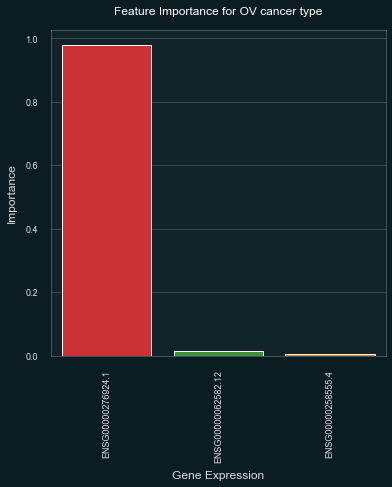

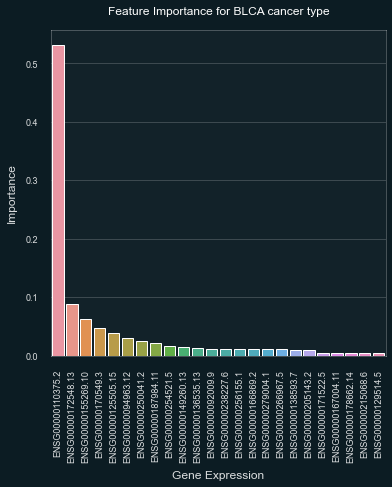

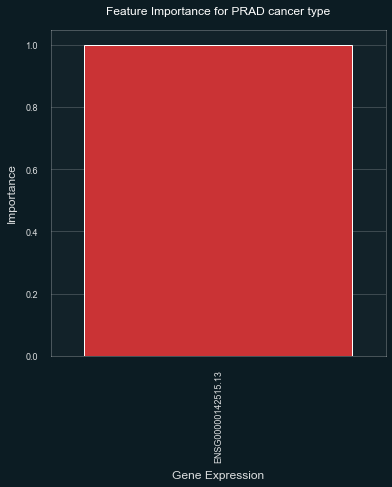

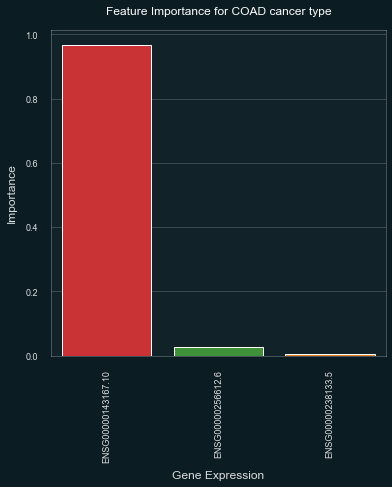

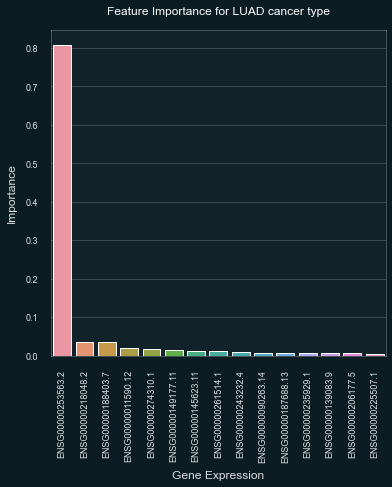

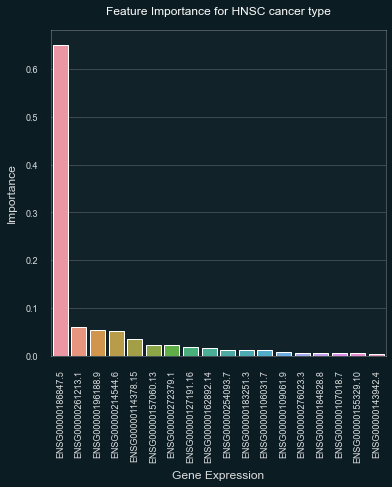

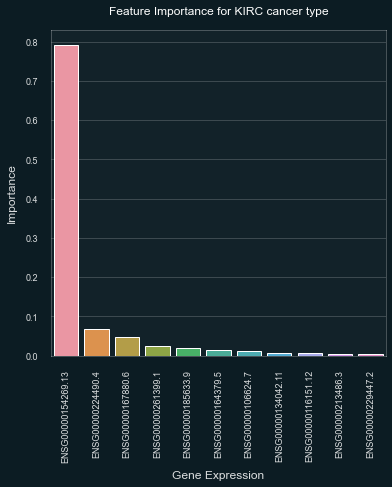

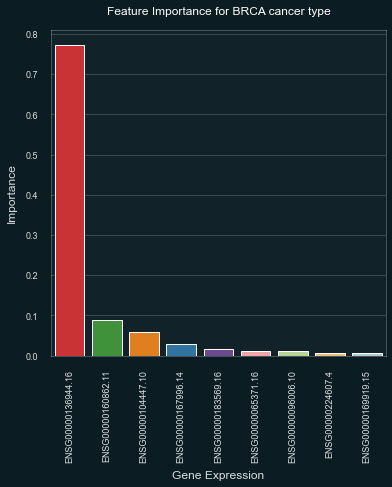

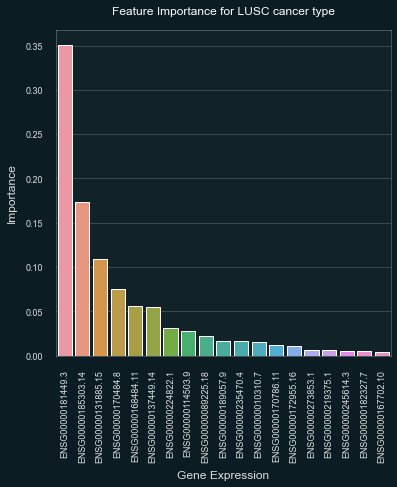

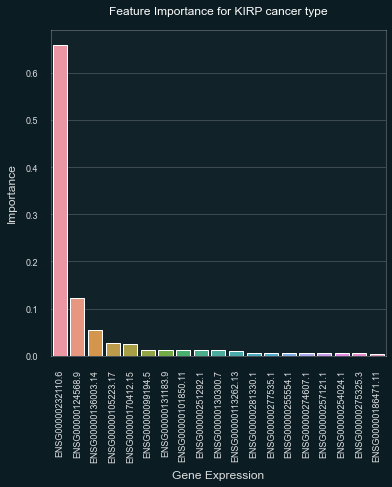

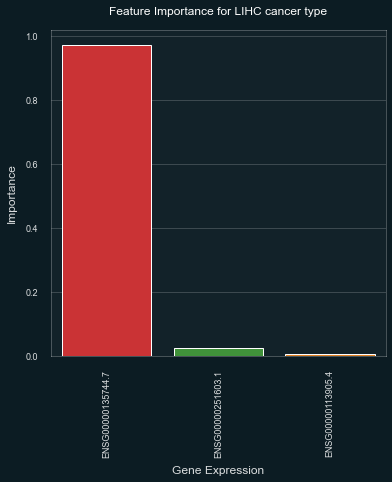

In [8]:
results = {} #Dictionary to save the results
for cancer in names:
    tree = DecisionTreeClassifier() #create the decision tree
    tree.fit(X = X, y = ydf[cancer]) #fitting the model
    features = pd.DataFrame() #creating a data frame that stores the important features as well as their importance value
    features[f'Col'] = X.columns #column of names
    features[f'Val'] = abs(tree.feature_importances_) #column of values
    features['Cancer'] = cancer #including which cancer type decision tree we got it from 
    features = features.sort_values(by = f'Val', ascending = False)
    features = features[features[f'Val'] != 0]
    results[cancer] = features
    p = sns.barplot(x=features.Col, y=features.Val) #creating visualizations
    p = p.set_xticklabels(labels=features.Col, rotation=90)
    plt.ylabel("Importance")
    plt.xlabel('Gene Expression')
    plt.title(f'Feature Importance for {cancer} cancer type')
    plt.show()

In [9]:
#storing each key in the dictionary into a seperate data frame
ov = results['OV']
blca = results['BLCA']
prad = results['PRAD']
coad = results['COAD']
luad = results['LUAD']
hnsc = results['HNSC']
kirc = results['KIRC']
brca = results['BRCA']
lusc = results['LUSC']
kirp = results['KIRP']
lihc = results['LIHC']


Now I am selecting the top variables used from each cancer type and creating visualizations to show why these variables have been chosen. 

In [10]:
ov = ov.iloc[0, :]
ov = pd.DataFrame(ov).T
ov

,Col,Val,Cancer
7620,ENSG00000276924.1,0.978807,OV


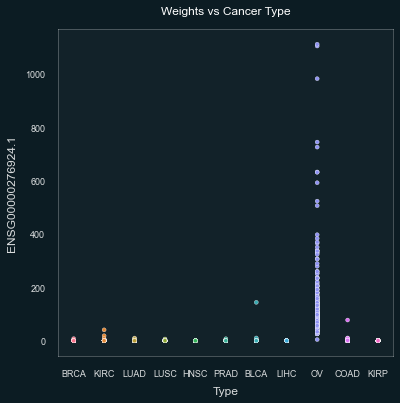

In [11]:
for i in range(ov.shape[0]):
    sns.scatterplot(x = y, y = X[ov.iloc[i, 0]], hue = y, legend = False)
    plt.grid(b=None)
    plt.title('Weights vs Cancer Type')
    plt.show()

In [12]:
blca['cumsum'] = blca.cumsum().Val
blca = blca.iloc[0:7]
blca

,Col,Val,Cancer,cumsum
17600,ENSG00000110375.2,0.531193,BLCA,0.531193
55793,ENSG00000172548.13,0.088555,BLCA,0.619749
56801,ENSG00000155269.10,0.063272,BLCA,0.683020
28704,ENSG00000170549.3,0.046719,BLCA,0.729739
25113,ENSG00000125505.15,0.039266,BLCA,0.769006
9740,ENSG00000094963.12,0.029783,BLCA,0.798789
5840,ENSG00000250041.2,0.025306,BLCA,0.824095


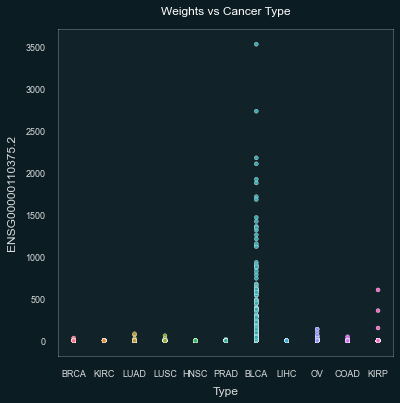

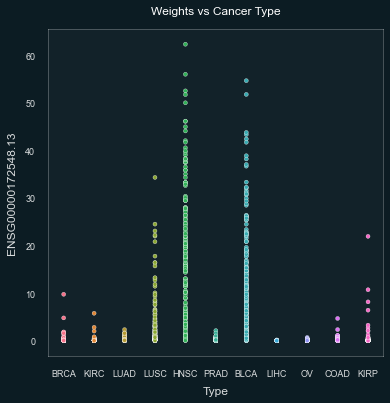

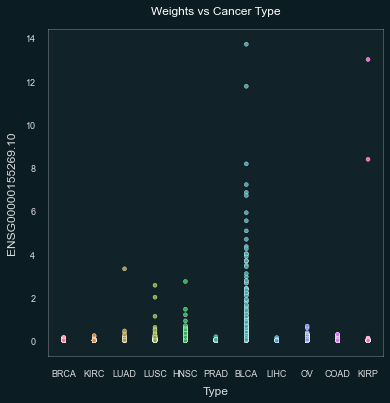

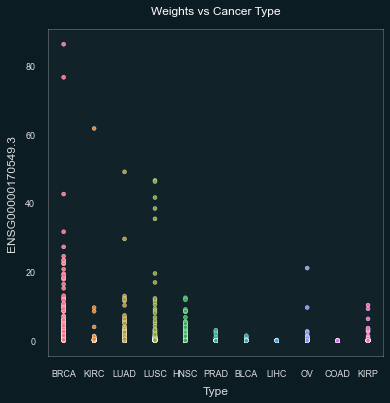

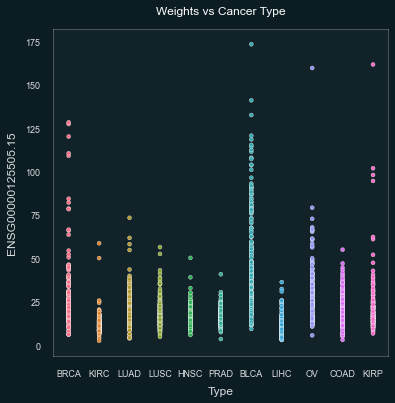

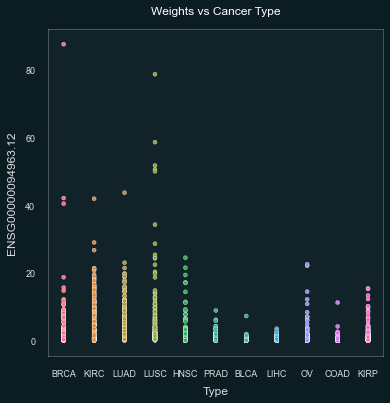

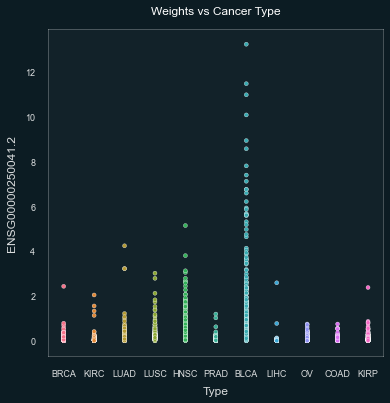

In [13]:
for i in range(blca.shape[0]):
    sns.scatterplot(x = y, y = X[blca.iloc[i, 0]], hue = y, legend = False)
    plt.grid(b=None)
    plt.title('Weights vs Cancer Type')
    plt.show()

In [14]:
prad.head()

,Col,Val,Cancer
33623,ENSG00000142515.13,1.0,PRAD


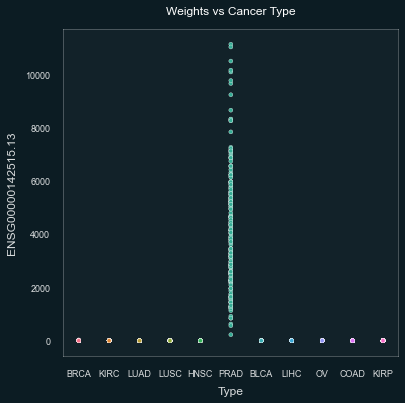

In [15]:
for i in range(prad.shape[0]):
    sns.scatterplot(x = y, y = X[prad.iloc[i, 0]], hue = y, legend = False)
    plt.grid(b=None)
    plt.title('Weights vs Cancer Type')
    plt.show()

In [16]:
coad.head()
coad = coad.iloc[0, :]
coad = pd.DataFrame(coad).T
coad

,Col,Val,Cancer
40097,ENSG00000143167.10,0.966507,COAD


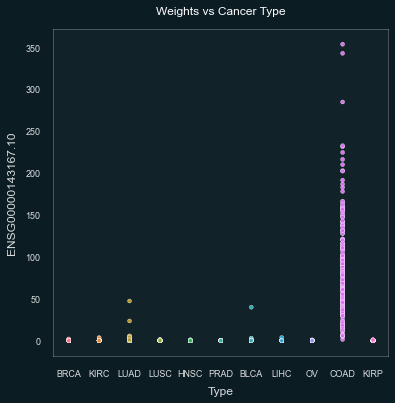

In [17]:
for i in range(coad.shape[0]):
    sns.scatterplot(x = y, y = X[coad.iloc[i, 0]], hue = y, legend = False)
    plt.grid(b=None)
    plt.title('Weights vs Cancer Type')
    plt.show()

In [18]:
luad.head()
luad['cumsum'] = luad.cumsum().Val
luad

,Col,Val,Cancer,cumsum
35051,ENSG00000253563.2,0.807372,LUAD,0.807372
25884,ENSG00000218048.2,0.035310,LUAD,0.842682
13689,ENSG00000188403.7,0.034823,LUAD,0.877505
42535,ENSG00000011590.12,0.021129,LUAD,0.898634
53917,ENSG00000274310.1,0.016480,LUAD,0.915114
22402,ENSG00000149177.11,0.016018,LUAD,0.931132
23840,ENSG00000145623.11,0.011472,LUAD,0.942604
17994,ENSG00000261514.1,0.011304,LUAD,0.953908
43646,ENSG00000243232.4,0.010312,LUAD,0.964220
35191,ENSG00000090263.14,0.007676,LUAD,0.971896


In [19]:
luad.head()
luad = luad.iloc[0:3, :]
luad = pd.DataFrame(luad)
luad

,Col,Val,Cancer,cumsum
35051,ENSG00000253563.2,0.807372,LUAD,0.807372
25884,ENSG00000218048.2,0.035310,LUAD,0.842682
13689,ENSG00000188403.7,0.034823,LUAD,0.877505


for i in range(luad.shape[0]):
    sns.scatterplot(x = y, y = X[luad.iloc[i, 0]])
    plt.show()

In [20]:
hnsc['cumsum'] = hnsc.cumsum().Val
hnsc.head()

,Col,Val,Cancer,cumsum
12110,ENSG00000186847.5,0.650668,HNSC,0.650668
26267,ENSG00000261213.1,0.060208,HNSC,0.710876
53996,ENSG00000196188.9,0.054191,HNSC,0.765067
36766,ENSG00000214544.6,0.052203,HNSC,0.817270
47031,ENSG00000114378.15,0.035413,HNSC,0.852683


In [21]:
hnsc = hnsc.iloc[0:5, :]
hnsc = pd.DataFrame(hnsc)
hnsc

,Col,Val,Cancer,cumsum
12110,ENSG00000186847.5,0.650668,HNSC,0.650668
26267,ENSG00000261213.1,0.060208,HNSC,0.710876
53996,ENSG00000196188.9,0.054191,HNSC,0.765067
36766,ENSG00000214544.6,0.052203,HNSC,0.817270
47031,ENSG00000114378.15,0.035413,HNSC,0.852683


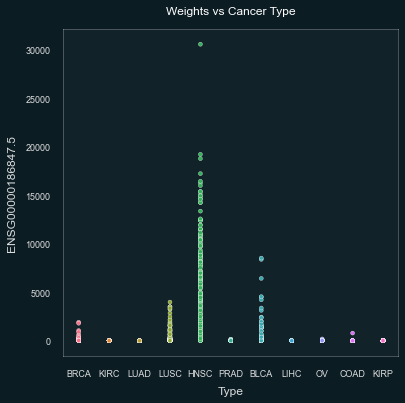

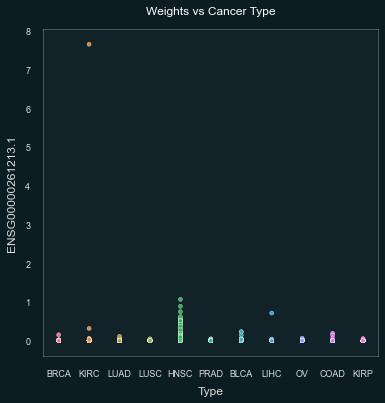

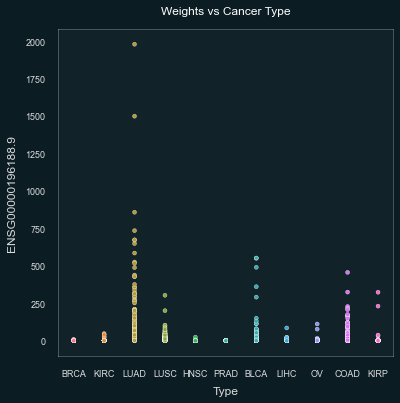

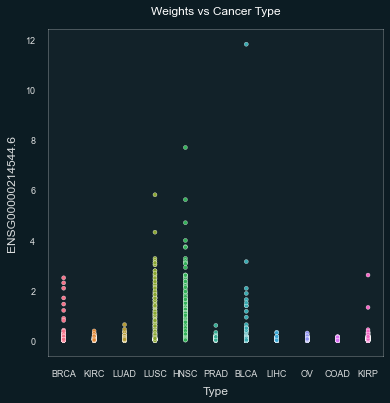

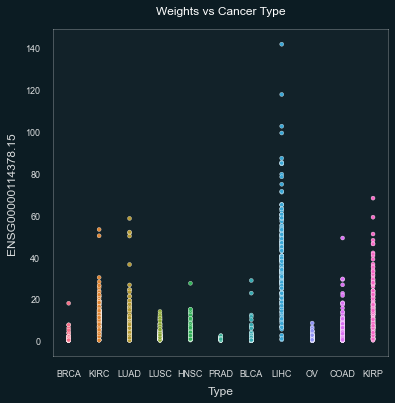

In [22]:
for i in range(hnsc.shape[0]):
    sns.scatterplot(x = y, y = X[hnsc.iloc[i, 0]], hue = y, legend = False)
    plt.grid(b=None)
    plt.title('Weights vs Cancer Type')
    plt.show()

In [23]:
kirc['cumsum'] = kirc.cumsum().Val
kirc

,Col,Val,Cancer,cumsum
32273,ENSG00000154269.13,0.791034,KIRC,0.791034
57983,ENSG00000224490.4,0.068304,KIRC,0.859338
483,ENSG00000167880.6,0.048829,KIRC,0.908167
399,ENSG00000261399.1,0.025446,KIRC,0.933613
53575,ENSG00000185633.9,0.018476,KIRC,0.952089
13622,ENSG00000164379.5,0.014794,KIRC,0.966883
53979,ENSG00000106624.7,0.011599,KIRC,0.978482
51194,ENSG00000134042.11,0.005809,KIRC,0.984291
48731,ENSG00000116151.12,0.005776,KIRC,0.990067
9017,ENSG00000213486.3,0.005283,KIRC,0.995351


In [24]:
kirc = kirc.iloc[0:2, :]
kirc = pd.DataFrame(kirc)
kirc

,Col,Val,Cancer,cumsum
32273,ENSG00000154269.13,0.791034,KIRC,0.791034
57983,ENSG00000224490.4,0.068304,KIRC,0.859338


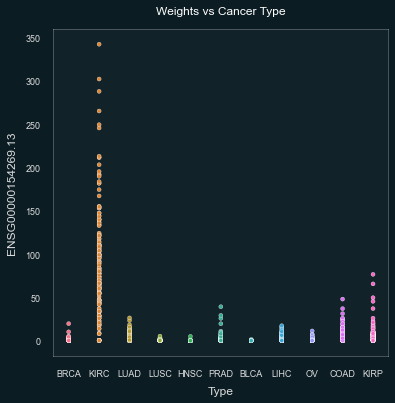

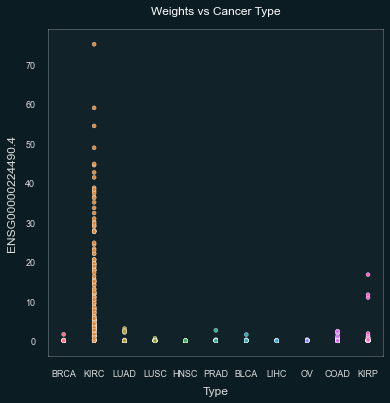

In [25]:
for i in range(kirc.shape[0]):
    sns.scatterplot(x = y, y = X[kirc.iloc[i, 0]], hue = y, legend = False)
    plt.grid(b=None)
    plt.title('Weights vs Cancer Type')
    plt.show()

In [26]:
brca['cumsum'] = brca.cumsum().Val
brca

,Col,Val,Cancer,cumsum
23314,ENSG00000136944.16,0.772515,BRCA,0.772515
17334,ENSG00000160862.11,0.089243,BRCA,0.861758
18339,ENSG00000104447.10,0.058317,BRCA,0.920075
42171,ENSG00000167996.14,0.027871,BRCA,0.947946
41986,ENSG00000183569.16,0.017400,BRCA,0.965346
57615,ENSG00000065371.16,0.011655,BRCA,0.977001
8190,ENSG00000096006.10,0.011630,BRCA,0.988631
5948,ENSG00000224607.4,0.005837,BRCA,0.994468
21465,ENSG00000169919.15,0.005532,BRCA,1.000000


In [27]:
brca = brca.iloc[0:2]
brca

,Col,Val,Cancer,cumsum
23314,ENSG00000136944.16,0.772515,BRCA,0.772515
17334,ENSG00000160862.11,0.089243,BRCA,0.861758


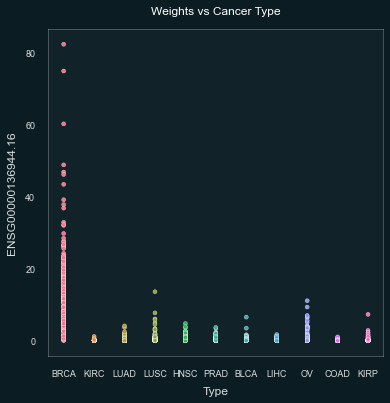

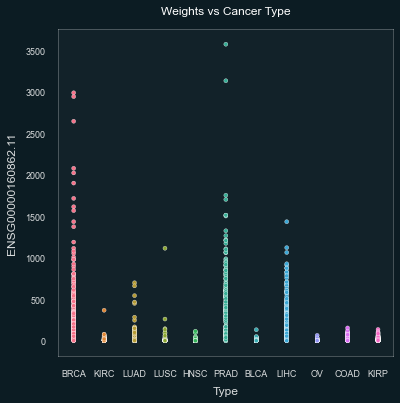

In [28]:
for i in range(brca.shape[0]):
    sns.scatterplot(x = y, y = X[brca.iloc[i, 0]], hue = y, legend = False)
    plt.grid(b=None)
    plt.title('Weights vs Cancer Type')
    plt.show()

In [29]:
lusc['cumsum'] = lusc.cumsum().Val

In [30]:
lusc = lusc.iloc[0:7]
lusc

,Col,Val,Cancer,cumsum
4738,ENSG00000181449.3,0.350516,LUSC,0.350516
6692,ENSG00000185303.14,0.173035,LUSC,0.523551
13025,ENSG00000131885.15,0.108656,LUSC,0.632207
35851,ENSG00000170484.8,0.075783,LUSC,0.707990
47330,ENSG00000168484.11,0.056331,LUSC,0.764321
19994,ENSG00000137449.14,0.055477,LUSC,0.819797
3039,ENSG00000224822.1,0.030847,LUSC,0.850644


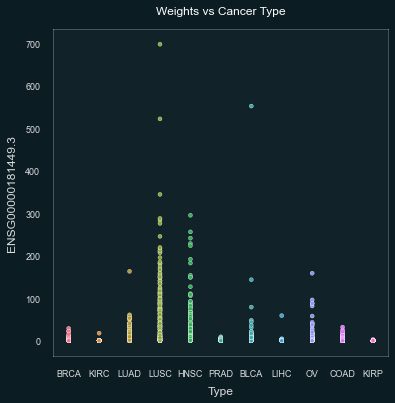

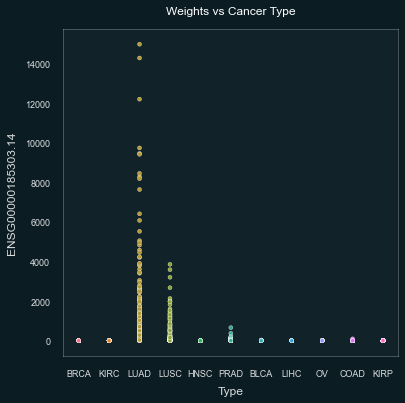

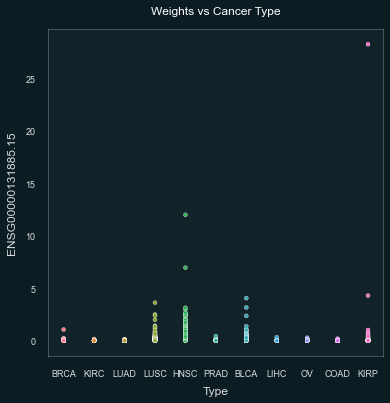

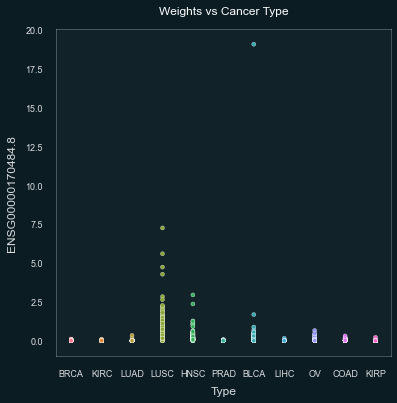

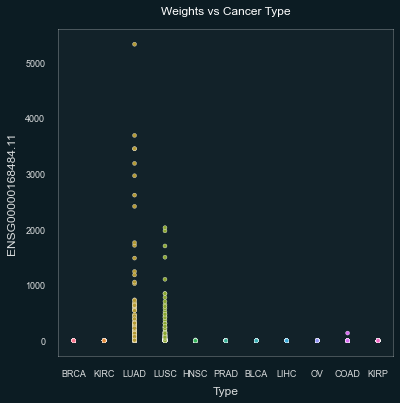

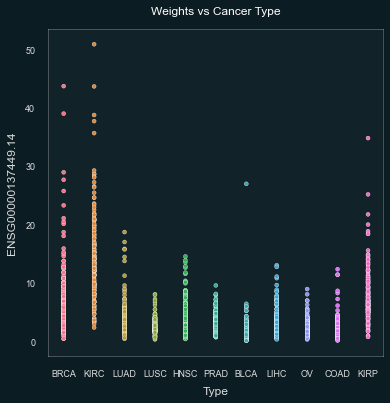

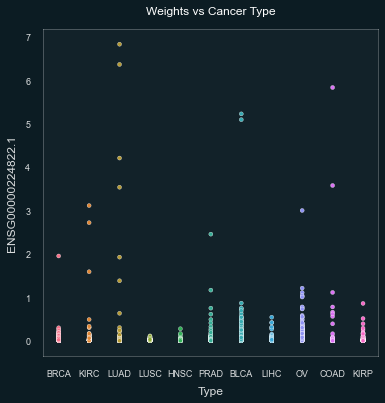

In [31]:
for i in range(lusc.shape[0]):
    sns.scatterplot(x = y, y = X[lusc.iloc[i, 0]], hue = y, legend = False)
    plt.grid(b=None)
    plt.title('Weights vs Cancer Type')
    plt.show()

In [32]:
kirp['cumsum'] = kirp.cumsum().Val

In [33]:
kirp = kirp.iloc[0:3]
kirp

,Col,Val,Cancer,cumsum
7679,ENSG00000232110.6,0.659608,KIRP,0.659608
32815,ENSG00000124568.9,0.121510,KIRP,0.781117
46917,ENSG00000136003.14,0.053802,KIRP,0.834920


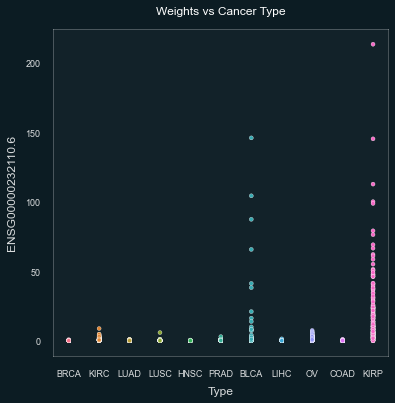

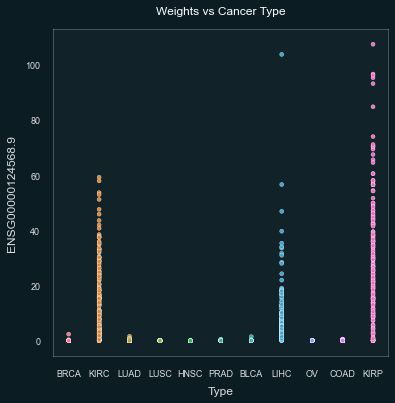

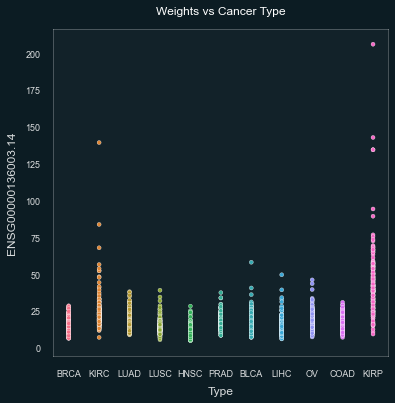

In [34]:
for i in range(kirp.shape[0]):
    sns.scatterplot(x = y, y = X[kirp.iloc[i, 0]], hue = y, legend = False)
    plt.grid(b=None)
    plt.title('Weights vs Cancer Type')
    plt.show()

In [35]:
lihc.head()
lihc = lihc.iloc[0, :]
lihc = pd.DataFrame(lihc).T
lihc

,Col,Val,Cancer
38122,ENSG00000135744.7,0.970456,LIHC


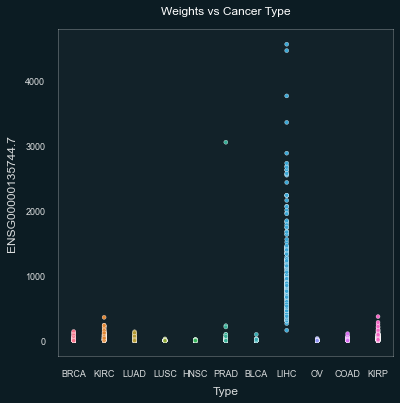

In [36]:
for i in range(lihc.shape[0]):
    sns.scatterplot(x = y, y = X[lihc.iloc[i, 0]], hue = y, legend = False)
    plt.grid(b=None)
    plt.title('Weights vs Cancer Type')
    plt.show()

In [37]:
col = pd.concat([ov, prad, blca, coad, luad, hnsc, kirc, brca, lusc, kirp, lihc], ignore_index=True, axis = 0)
#cancatenating all the top selected features into one data frame

In [38]:
nan = list(col.isna()['cumsum'])
fill = col.Val[nan]
col['cumsum'][nan] = fill
col

/var/folders/bf/1rqft59539x2lszpd3glzgq40000gn/T/ipykernel_74481/1528817988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col['cumsum'][nan] = fill


,Col,Val,Cancer,cumsum
0,ENSG00000276924.1,0.978807,OV,0.978807
1,ENSG00000142515.13,1.0,PRAD,1.0
2,ENSG00000110375.2,0.531193,BLCA,0.531193
3,ENSG00000172548.13,0.088555,BLCA,0.619749
4,ENSG00000155269.10,0.063272,BLCA,0.68302
5,ENSG00000170549.3,0.046719,BLCA,0.729739
6,ENSG00000125505.15,0.039266,BLCA,0.769006
7,ENSG00000094963.12,0.029783,BLCA,0.798789
8,ENSG00000250041.2,0.025306,BLCA,0.824095
9,ENSG00000143167.10,0.966507,COAD,0.966507


In [39]:
col.to_pickle('CTFS.pkl') #saving it to a pickle to create the models.

In [40]:
col.Col.value_counts() #checking if any of the variables are duplicates

ENSG00000276924.1     1
ENSG00000114378.15    1
ENSG00000136003.14    1
ENSG00000124568.9     1
ENSG00000232110.6     1
ENSG00000224822.1     1
ENSG00000137449.14    1
ENSG00000168484.11    1
ENSG00000170484.8     1
ENSG00000131885.15    1
ENSG00000185303.14    1
ENSG00000181449.3     1
ENSG00000160862.11    1
ENSG00000136944.16    1
ENSG00000224490.4     1
ENSG00000154269.13    1
ENSG00000214544.6     1
ENSG00000142515.13    1
ENSG00000196188.9     1
ENSG00000261213.1     1
ENSG00000186847.5     1
ENSG00000188403.7     1
ENSG00000218048.2     1
ENSG00000253563.2     1
ENSG00000143167.10    1
ENSG00000250041.2     1
ENSG00000094963.12    1
ENSG00000125505.15    1
ENSG00000170549.3     1
ENSG00000155269.10    1
ENSG00000172548.13    1
ENSG00000110375.2     1
ENSG00000135744.7     1
Name: Col, dtype: int64

In [41]:
classif = df.loc[:, list(col.Col)] #subset the dataset with only the chosen variables

In [42]:
classif.insert(loc = 0, column = 'Type', value = df.Type )

In [43]:
classif.to_pickle('classdf.pkl') #save to pickle